Objective: To carry out the analysis of reflections on the contour of structures in order to ensure low frequency reliability of experimental data.

# Analysis of reflections

The distance of the sensor (eg accelerometer) from the outline of the structure will depend on what minimum frequency you wish to observe. Considering a beam, with bending efforts, two types of waves are generated, a propagating wave and an evanescent one, which move in the positive and negative directions. For this analysis, the term referring to the reflected evanescent wave is then verified the ratio of the evanescent wave in the control by the amplitude of the wave at position x:

$$
b_{N}^{-}e^{+kx}
$$

where k is the wave number and $b_{N}^{-}$ is the wave amplitude:


         .________________________o_____o_______o_____o_____o_____o_.
    x=0  .__________________________________________________________. x=L  
    
where $o$ are the accelerometers.

wavenumber estimation:

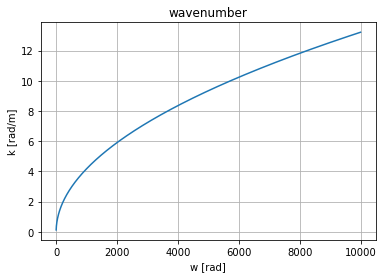

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt 

L = 1.41       # length [m]
di = 0.019     # internal diameter [m]
ri = di/2      # internal radius [m]
de = 0.0254    # external diameter [m]
re = de/2      # external radius [m]
h =  (de-de)/2 # wall thickness [m]
m = 0.33978    # mass [kg]
g = 9.8        # gravity acceleration [m/s^2]
rho_f = 996    # fluid density [kg/m^3]
rho_p = 1079   # mass density [kg/m^3]
U = 1.5        # internal flow velocity [m/s] 
E = 193.23e9   # modulus of elasticity [GPa]
I = math.pi*((de**4)-(di**4))/64 # flexural rigidity

# Duct cross-sectional area
A =  math.pi*(de**2 -di**2)/4

# Duct internal area 
Ai = math.pi*(di**2)/4

# total area
At = Ai + A

def wavenumber(E, I, rho_f, rho_p, Ai, At, v_f, w):
# The wavenumber is calculated considering
# Equation motion of pipe for the single-phase flow using Euler-Bernoulli beam model
#    input:
#        EI: flexural stiffness
#        rho_f: specific mass of fluid
#        rho_p: specific masses of pipe
#        At: cross-section area
#        Ai: internal area
#        v_f: velocity of flow
#        w: frequency [rad]
#    output:
#        k: wavenumber
    import numpy as np
    import math
 
    AA = E*I
    BB = 0
    CC = -rho_f*Ai*(v_f**2)
    DD = 2*rho_f*Ai*v_f*(w)
    EE = -(rho_p*At + rho_f*Ai)*(w**2) #[kg/m]
    
    coeff = [AA, BB, CC, DD, EE] #Blavins
    roots = np.roots(coeff)
    r  = sorted(roots.real) #sorts in ascending order
    k = r[-1]
    return k

N = 10000
w = np.linspace(1,N,N, endpoint=True)  
dt = w[1]-w[0]              
fs = round(1/dt) 

k = np.zeros((N))
for nn in range (0, len(w)):
    k[nn] = wavenumber(E, I, rho_f, rho_p, Ai, At, U, w[nn])


plt.figure()
plt.plot(w, k)
plt.xlabel('w [rad]')
plt.ylabel('k [rad/m]')
plt.title('wavenumber')
plt.grid()

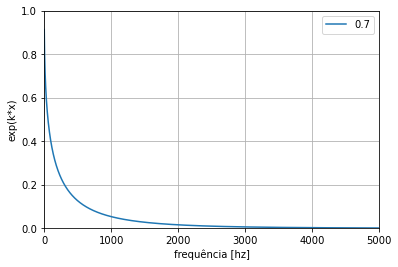

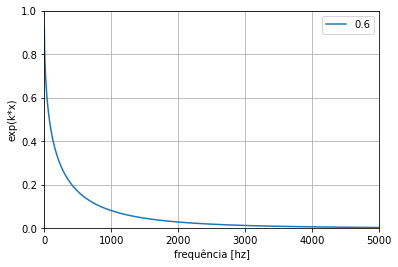

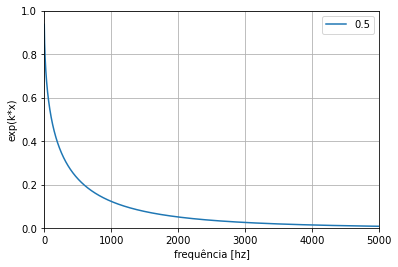

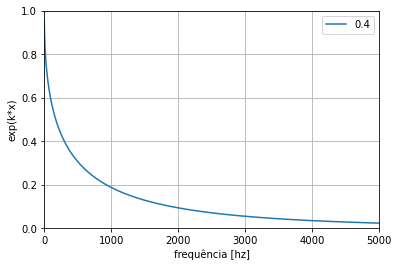

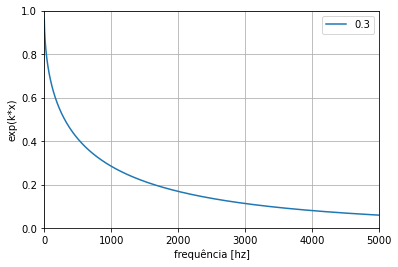

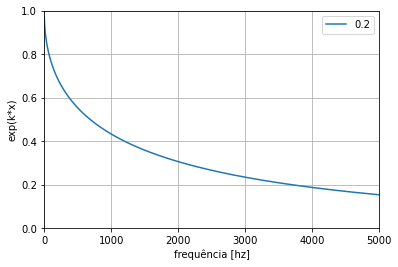

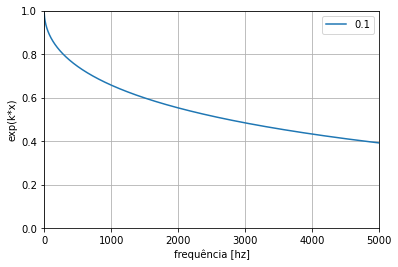

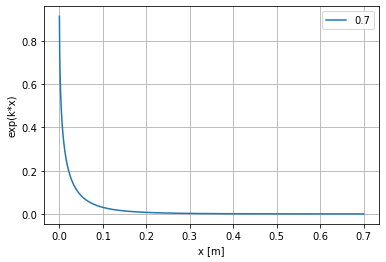

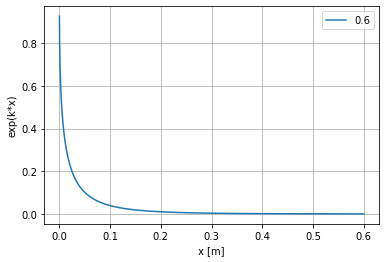

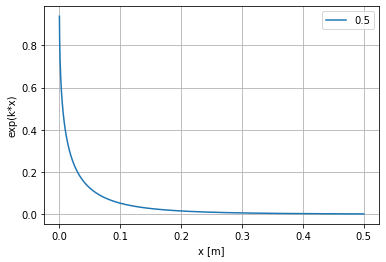

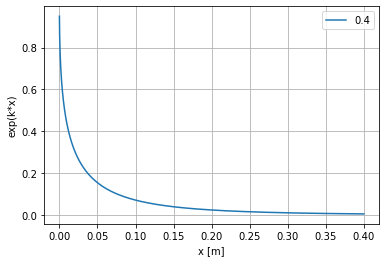

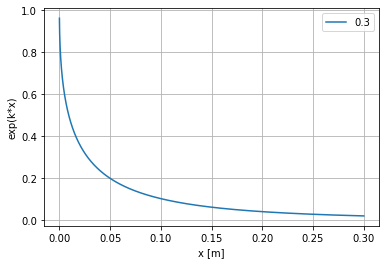

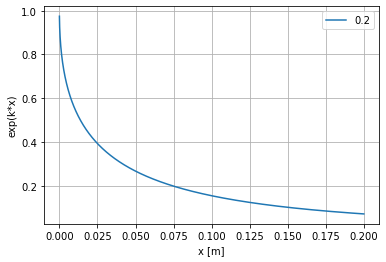

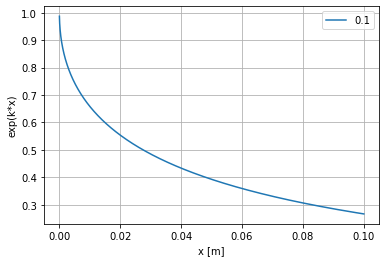

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt 

x = [0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] # m
e = np.zeros((len(x), len(w)), dtype=float)

plt.figure()
for jj in range (0, len(x)):
    for ii in range (0, len(k)):
        e[jj, ii] = np.exp(-k[ii]*x[jj])
    plt.plot(w, e[jj, :], label = x[jj])
    plt.xlabel('frequência [hz]')
    plt.ylabel('exp(k*x)')
    plt.xlim(0, 5000)
    plt.ylim(0, 1)
    plt.grid()
    plt.legend()
    plt.show()

plt.figure()
for kk in range (0, len(x)):
    d = np.linspace(0, x[kk], N, endpoint=True) 
    
    plt.plot(d, e[kk, :], label = x[kk])
    plt.xlabel('x [m]')
    plt.ylabel('exp(k*x)')
    plt.legend()
    plt.grid()
    plt.show()
        